In [ ]:

import cv2 as cv
import sys
img = cv.imread("my_plot.png" )

if img is None:
    sys.exit("could not read the image")

cv.namedWindow('display window',cv.WINDOW_NORMAL)
cv.imshow("display window",img)
k = cv.waitKey(0)
cv.destroyAllWindows()

if k == ord("s"):
    cv.imwrite("my_cvplot.jpg",img)

下面的代码程序将加载并显示为灰度图像，按's'则保存图像并退出，按'ESC'键直接退出且不保存。

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread("my_plot.png",0)
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27: #wait for esc key to exit
    cv.destroyAllWindows()
elif k == ord('s'):
    cv.imwrite('my_cv_plot.png',img)
    cv.destroyAllWindows()

用摄像头捕获视频
通常，我们需要用摄像头来捕获直播画面，OpenCV为此提供了一些非常简单的函数接口。下面我们来尝试用摄像头来捕获视频画面（我使用的是电脑的内置摄像头）并将画面转化成灰度图像显示，这项操作很简单。 如果要捕获视频，首先要做的是创建一个VideoCapture对象，它的参数可以是设备索引或者是视频文件的名称。设备索引就是指设备所对应的设备号，当只连接一个摄像头，参数只需传递0（或-1） 。你可以传递参数1来选择你连接的第二个摄像头等等。接下来，你需要逐帧捕获并显示并不要忘记关闭捕获。

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
while(True):
    # capture frame by frame
    ret , frame = cap.read()
    #our opretions on the frame come here 
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    #display the resulting 
    cv.imshow('frame',gray)
    # if cv.waitKey(0):
    #     break
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
#when everything done,release the capture
cap.release()
cv.destroyAllWindows()

目标：
用OpenCV绘制图形
掌握函数：cv.line(), cv.circle() , cv.rectangle(), cv.ellipse(), cv.putText()  
代码
上述函数的参数： 
- img：用于设置图像
 - color：用于设置颜色。是一个RGR值，将用元组传递，例如：（255,0,0）为蓝色。对于灰度图像，只需传递标量值。 
 - thickness：用于设置线条或圆形等的厚度。如果是- 1则在图案内生成闭合图案并填充颜色。这个参数的默认厚度为1。
  - lineType：用于设置线条的类型，有8型连接，抗锯齿等。默认情况是8型连接。cv2.LINE_AA为抗锯齿，这样看起来会非常平滑。

绘制直线
要绘制线条，你需要设置起点和终点坐标。我们将创建一个黑色图像，并在其上从左上角到右下角绘制一条蓝线。 

In [ ]:
import numpy as np
import cv2 as cv
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
#要绘制矩形，你需要设置矩形的左上角和右下角的坐标。这次我们将在图像的右上角绘制一个绿色矩形。 
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
#要绘制圆形，你需要设置其圆点坐标和半径，我们将在上面绘制的矩形内绘制一个圆。 
cv.circle(img,(447,63), 63, (0,0,255), -1)
#要绘制椭圆，我们需要传递几个参数，一个参数是椭圆中心位置（x，y），下一个是长轴长度和断轴长度（a，b），角度是椭圆在逆时针方向上的旋转角度，
# startAngle和endAngle表示从主轴顺时针方向测量的椭圆弧的起点和终点，即给出值0和360给出完整的椭圆，给出值180则画出半个椭圆。
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
#要绘制多边形，首先需要顶点坐标。 将这些点转换为ROWSx1x2的数组，其中ROWS是顶点数，它应该是int32类型。在这里，我们绘制一个带有四个黄色顶点的小多边形。 
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))

'''
要将文本放入图像中，你需要传递以下几个参数： - 要写入的文本数据， - 要放置的位置（即文本数据的左下角） - 字体类型（检查cv.putText（）文档以获取支持的字体），
 - 字体大小 - 常规的参数，比如颜色、粗细、线型等，为了更好看，建议使用lineType = cv.LINE_AA作为线型参数的值。
'''
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
cv.imshow("display window",img)
cv.waitKey()
cv.destroyAllWindows()

这里我们来创建一个简单的程序，他会在图片上你双击的位置绘制一个圆圈。首先我们来创建一个鼠标事件回调函数，鼠标事件发生是他就会被执行。鼠标事件可以是鼠标上的任何动作，比如左键按下，左键松开，左键双击等。我们可以通过鼠标事件获得与鼠标对应的图片上的坐标。根据这些信息我们可以做任何我们想做的事。你可以通过执行下列代码查看所有被支持的鼠标事件：

In [ ]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i]
print(events)

In [ ]:
import numpy as np
import cv2 as cv

#mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)

#create a black image,a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

现在我们来创建一个更好的程序。这次我们的程序要完成的任务是根据我们选择的模式在拖动鼠标时绘制矩形或者是圆圈（就像画图程序中一样）。所以我们的回调函数包含两部分，一部分画矩形，一部分画圆圈。这是一个典型的例子他可以帮助我们更好理解与构建人机交互式程序，比如物体跟踪，图像分割等

In [ ]:
import numpy as np
import cv2 as cv

drawing = False #true if mouse is pressed
mode = True #if True,draw rectangle.Press 'm' to toggle to curve
ix,iy = -1,-1

#mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else: 
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
        #接下来，我们必```须将此鼠标回调函数绑定到OpenCV窗口。在主循环中，我们应该把按键'm'设置为切换绘制矩形还是圆形。 参考以下代码：


img = np.zeros((512,512,3),np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k ==27:
        break
cv.destroyAllWindows()
    

目标：
学习把滑动条绑定到OpenCV窗口中
学习以下函数：cv.getTrackbarPos(), cv.createTrackbar()

在这里，我们将创建一个简单的应用程序，完成显示指定的颜色。你有一个显示颜色的窗口和三个滑动条，分别用于指定B，G，R各颜色。你可以去拖动滑动条上的按钮去更改窗口所显示的颜色。默认情况下，初始颜色将设置为黑色。 对于cv.getTrackbarPos()函数，第一个参数是滑动条名称，第二个参数是它所附加的窗口名称，第三个参数是默认值，第四个参数是最大值，第五个参数是执行的回调函数每次轨迹栏值都会发生变化。回调函数始终具有默认参数，即滑动条位置。在我们的例子中，函数什么都不做，所以我们简单地跳过。 轨迹栏的另一个重要应用是将其用作按钮或开关。默认情况下，OpenCV没有按钮功能。因此，你可以使用滑动条来获得此类功能。在我们的应用程序中，我们创建了一个开关，其中应用程序仅在开关打开时有效，否则屏幕始终为黑色。 参考一下代码：

In [ ]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass

#create a black image,a window
img = np.zeros((300,512,3),np.uint8)
cv.namedWindow('image')

# create trackbars for color change
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1)&0xFF
    if k == 27:
        break
         # get current positions of four trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv.destroyAllWindows()

Goal
Learn to:

Access pixel values and modify them
Access image properties
Set a Region of Interest (ROI)
Split and merge images

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('bubu.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
px = img[100,100]
print(px)
blue = img[100,100,0]
print(blue)
green = img[100,100,1]
print(green)
img[100,100] = [255,255,255]
print(img[100,100])


Better pixel accessing and editing method :

In [ ]:
# accessing RED value
img.item(10,10,2)

#modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)
print(img.shape)
#Total number of pixels is accessed by img.size:
print(img.size)
print(img.dtype)


In [ ]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
img[:,:,2] = 0
cv.imshow("display window",img)
cv.waitKey()
cv.destroyAllWindows()

Making Borders for Images (Padding)
If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

src - input image
top, bottom, left, right - border width in number of pixels in corresponding directions
borderType - Flag defining what kind of border to be added. It can be following types:
cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
cv.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
cv.BORDER_REFLECT_101 or cv.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
cv.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
cv.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
value - Color of border if border type is cv.BORDER_CONSTANT

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 

BLUE = [255,0,0]
img1 =  cv.imread('bubu.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')


Goal
In this tutorial, you will learn how to convert images from one color-space to another, like BGR ↔ Gray, BGR ↔ HSV, etc.
In addition to that, we will create an application to extract a colored object in a video
You will learn the following functions: cv.cvtColor(), cv.inRange(), etc.

目标：
学习对图像的几种运算，如加法、减法、按位运算等
学习以下函数： cv.add(), cv.addWeighted()

图像的加法
你可以使用OpenCV的cv.add()函数把两幅图像相加，或者可以简单地通过numpy操作添加两个图像，如res = img1 + img2。两个图像应该具有相同的大小和类型，或者第二个图像可以是标量值。

注意：OpenCV加法和Numpy加法之间存在差异。OpenCV的加法是饱和操作，而Numpy添加是模运算。

In [ ]:
import numpy as np
import cv2 as cv
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y))
print(x+y)
#这种差别在你对两幅图像进行加法时会更加明显。OpenCV 的结果会更好一点。所以我们尽量使用 OpenCV 中的函数。


图像的混合

In [ ]:
img1 = cv.imread('bubu.jpg')
height,width,channels = img1.shape

img2 = cv.imread('my_plot.png')
img2_resized = cv.resize(img2,(width,height))


dst= cv.addWeighted(img1,0.7,img2_resized,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

图像按位操作
这里包括的按位操作有：AND，OR，NOT，XOR 等。当我们提取图像的一部分，选择非矩形ROI时这些操作会很有用（你会在后续章节中看到）。

我想把OpenCV的标志放到另一幅图像上。如果我使用图像的加法，图像的颜色会改变，如果使用图像的混合，会得到一个透明的效果，但是我不希望它透明。如果它是矩形我可以像上一章那样使用ROI。但是OpenCV标志不是矩形。所以我们可以通过下面的按位运算实现：

In [ ]:
img1= cv.imread('westbrook.jpg')
img2 = cv.imread('dclogo.png')
#i want to put logo on top-left corner ,So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows,0:cols]
#now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret,mask = cv.threshold(img2gray ,10, 255,cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)


# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

目标：
在图像处理中，由于每秒需要处理大量操作，因此处理图像的代码必须不仅要能给出正确的结果，同时还必须要快。所以在本小节中，学习： - 衡量代码的性能。 - 一些优化代码性能的技巧 - 学习以下函数：cv.getTickCount, cv.getTickFrequency

除了OpenCV库之外，Python还提供了一个time模块，有助于测量执行时间。另一个profile模块可以获得有关代码的详细报告，例如代码中每个函数所花费的时间，调用函数的次数等。如果你使用的是IPython，所有这些功能都以一个有好的方式整合到一起。

In [ ]:
e1 = cv.getTickCount()

e2 = cv.getTickCount()
time = (e2 - e1)/cv.getTickFrequency

In [ ]:
img1 = cv.imread('westbrook.jpg')

e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

In [ ]:
import time
t1 = time.time()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
t2 = time.time()
t = t2 -t1
print(t)


In [ ]:
cv.useOptimized()

注意：通常，OpenCV函数比Numpy函数更快。因此对于相同的操作，OpenCV功能是首选。但是可能也有例外，尤其是当使用Numpy对视图而不是复制数组时。

In [ ]:
x= 5
%timeit y = x**2

%timeit y=x*x

性能优化技术
有几种技术和编码方法可以利用Python和Numpy的最大性能。此处仅注明相关的内容，并提供重要来源的链接。这里要注意的主要是，首先尝试以简单的方式实现算法。一旦工作，对其进行分析，找到瓶颈并进行优化。

尽量避免在Python中使用循环，尤其是双层/三层嵌套循环等。它们本身就很慢。
将算法/代码尽量使用向量化操作，因为Numpy和OpenCV针对向量运算进行了优化。
利用高速缓存一致性。
除非需要，否则不要复制数组。尝试使用视图去替代复制数组。数组复制是一项非常浪费资源的操作。
即使在完成所有这些操作之后，如果你的代码仍然很慢，或者使用大型循环是不可避免的，请使用其他库（如Cython）来加快速度。

#  4. OpenCV中的图像处理 » 4.1. 改变颜色空间

目标：
学习将图像从一个颜色空间转换为另一个颜色空间，例如BGR↔Gray，BGR↔HSV
创建一个提取视频中某个特定彩色对象的应用程序
学习以下函数：cv.cvtColor()，cv.inRange()

In [ ]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)


对象提取
现在我们知道如何将BGR图像转换为HSV，我们可以使用HSV色彩空间来提取彩色对象。在HSV中表示颜色比在BGR颜色空间中更容易。在我们的程序中，我们将尝试提取视频画面中的蓝色对象。下面是方法程序执行步骤：

获取视频中的每一帧
从BGR转换为HSV颜色空间
我们为HSV图像设定一系列的蓝色阈值
单独提取蓝色对象并显示，之后我们便可以对我们想要的图像做任何事情。

对于HSV色彩空间，Hue(色调)的取值范围是[0,179]，Saturation(饱和度)的取值范围是[0,255]，Value(明度)的取值范围是[0,255]。

In [ ]:
import cv2 as cv
import numpy as np

# Open the ZED camera
cap = cv.VideoCapture(1)
if cap.isOpened() == 0:
    exit(-1)

while(1):
    # take each frame
    _,frame = cap.read()
    # convert bgr to hsv
    hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    #threshold the hsv image to get onlt blue colors
    mask = cv.inRange(hsv,lower_blue,upper_blue) #函数用于创建一个二值掩码图像，其中只有在指定的颜色范围内的像素将被设置为白色（255），而其他像素将被设置为黑色（0）。mask 是这个掩码图像，它表示了图像中蓝色的区域。

    #bitwise-and mask and original image
    res = cv.bitwise_and(frame,frame,mask=mask)

    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) &0xFF
    if k == 27:
        break

cap.release()
cv.destroyAllWindows()





如何去查找确定HSV值
这是我们在stackoverflow.com中常见的问题。其实解决这个问题非常简单，你可以使用相同的函数cv.cvtColor()。你只需传递所需的BGR值，而不是传递图像。例如，要查找绿色的HSV值，在Python终端中输入以下命令：

In [ ]:
green = np.uint8([[[0,255,0]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print(hsv_green)

4.2. 图像的几何变换
将不同的几何变换应用于图像，如平移，旋转，仿射变换
学习函数：cv.getPerspectiveTransform

转换
OpenCV提供了两个转换函数cv.warpAffine和cv.warpPerspective，你可以使用它们进行各种转换。cv.warpAffine采用2x3变换矩阵作为参数输入，而cv.warpPerspective采用3x3变换矩阵作为参数输入。
缩放
缩放只是调整图像大小，OpenCV有一个函数cv.resize()，可以手动指定图像的大小以及缩放系数，可以使用不同的插值方法，常用的插值方法是用于缩小的cv.INTER_AREA和用于缩放的cv.INTER_CUBIC（慢）和cv.INTER_LINEAR。默认情况下，使用的插值方法是cv.INTER_LINEAR，它用于所有调整大小的操作。你可以使用以下方法之一调整输入图像的大小：

仿射变换（Affine Transformation）是一种线性变换，用于将一个二维图像从一个坐标系统映射到另一个坐标系统。这种变换保持了图像中的平行线在变换前后仍然保持平行，但可以对图像进行平移（Translation）、旋转（Rotation）、缩放（Scaling）和剪切（Shear）等操作。仿射变换通常由一个2x3的矩阵表示，其中包括平移、旋转和缩放的参数。

仿射变换的一些常见应用包括：

图像校正：在计算机视觉中，仿射变换可以用于矫正图像中的透视变形，使图像中的对象恢复到原始的形状。

图像缩放和旋转：可以使用仿射变换来放大、缩小和旋转图像。

图像拼接：在图像拼接和全景图像合成中，仿射变换可以用于将多幅图像对齐，以创建一个更大的全景图像。

计算机图形学：在计算机图形学中，仿射变换用于在屏幕上渲染2D图形，包括图像平移、旋转和缩放等操作。

图像处理：在图像处理中，可以使用仿射变换来对图像进行几何变换，如裁剪、翻转和变形等。

仿射变换与透视变换不同，透视变换可以处理更一般的图像变换，包括视角变化和透视投影。在仿射变换中，平行线仍然保持平行，而在透视变换中，平行线可能会交汇，因此透视变换更一般化，但也更复杂。

总之，仿射变换是一种常见的二维图像变换方法，它可以用于许多计算机视觉和图形学应用中，用于处理和操作图像。






In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('westbrook.jpg')
assert img is not None,"file could not be read ,check with os.path.exists()"

res = cv.resize(img,None,fx=2,fy=2,interpolation = cv.INTER_CUBIC) #interpolation=cv.INTER_CUBIC: 这是插值方法的选项，用于确定如何在调整大小过程中处理像素之间的插值。在这里，cv.INTER_CUBIC 表示使用三次立方插值，这是一种高质量的插值方法，适用于图像的放大。

#or 这个更好理解

height,width = img.shape[:2]
res = cv.resize(img,(2*width,2*height),interpolation=cv.INTER_CUBIC)


cv.imshow('img',img)
cv.imshow('res',res)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('westbrook.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not be read ,check with os.path.exists()"
rows,cols = img.shape


M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

cv.warpAffine(img,M,(cols,rows))

cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
img = cv.imread('westbrook.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read,check with os.path.exists()"
rows,cols = img.shape

#cols-1 and rows-1 are the coordinate limits
'''
这一行代码使用OpenCV的cv.getRotationMatrix2D()函数创建一个旋转变换矩阵M。
((cols-1)/2.0, (rows-1)/2.0)：这是旋转中心的坐标，通常设置为图像中心。cols 和 rows 分别是图像的列数和行数，((cols-1)/2.0, (rows-1)/2.0) 计算出了图像的中心坐标。
90：这是旋转的角度，以度为单位。在这里，设置为90度，表示顺时针旋转90度。
1：这是缩放因子，表示不对图像进行缩放。
'''
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)

'''
这一行代码使用OpenCV的cv.warpAffine()函数将图像img进行仿射变换，使用之前创建的旋转变换矩阵M。
(cols, rows)：这是输出图像的大小，通常设置为与原始图像相同的大小。
结果将存储在变量dst中，这是旋转后的图像。
'''
dst = cv.warpAffine(img,M,(cols,rows))

# cv.imshow('img',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(img)
plt.title('img')

Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

Check the below example, and also look at the points I selected (which are marked in green color):

In [ ]:
import matplotlib.pyplot as plt
img = cv.imread('bubu.jpg')
assert img is not None,"file could not be read"
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()



Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function cv.getPerspectiveTransform. Then apply cv.warpPerspective with this 3x3 transformation matrix.

In [ ]:
img = cv.imread('bubu.jpg')
assert img is not None,"file could not be read"
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)
dst=  cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


Goal
In this tutorial, you will learn simple thresholding, adaptive thresholding and Otsu's thresholding.
You will learn the functions cv.threshold and cv.adaptiveThreshold.
Simple Thresholding

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('bubu.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


邻域值的高斯加权和是一种在图像处理和计算机视觉领域常用的图像滤波方法之一。它通常用于图像去噪和平滑的任务中，旨在减少图像中的噪声并保留图像的主要特征。

该方法的基本思想是，对于图像中的每个像素，以该像素为中心构建一个局部邻域（也称为窗口或卷积核），然后计算该邻域内每个像素的权重，这些权重是根据高斯分布函数计算的。高斯分布函数的参数通常包括均值（指定中心像素）和标准差（控制权重分布的广度）。

然后，对于每个像素，将其邻域内的像素值与相应的权重相乘，并将所有这些乘积值相加，从而得到新的像素值。这个新像素值将取代原始像素值，从而实现了平滑和去噪效果。通常情况下，邻域值越接近中心像素的像素将具有更高的权重，因此在计算新像素值时更加重要。

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shudu.png',0)
assert img is not None,"file could not read"
'''
cv.medianBlur()函数用于应用中值模糊（Median Blur）滤波器来处理图像。
img是输入的图像，它是要进行模糊处理的图像数据。
5是滤波器的内核大小（kernel size）。这个参数决定了模糊的程度。在这里，内核大小为5x5，表示对图像的每个像素周围的5x5邻域像素值进行排序并取中值。中值模糊是一种非线性滤波方法，通常用于去除图像中的椒盐噪声或其他类型的噪声，同时保留图像的边缘特征。
这段代码的作用是对变量img中的图像应用中值模糊滤波，以平滑图像并减少图像中的噪声。中值模糊对于保留图像的边缘信息而不过度模糊非常有用，因此在图像处理中经常被用于预处理步骤。处理后的图像将存储在同一变量img中，以便后续分析或显示。
'''
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# plt.imshow(img)
# plt.imshow(th1)

大津二值化Otsu's Binarization

在全局阈值处理中，我们使用任意选择的值作为阈值。相比之下，大津的方法避免了必须选择一个值并自动确定它。

考虑只有两个不同图像值的图像（双峰图像），其中直方图仅包含两个峰值。一个好的阈值应该位于这两个值的中间。类似地，大津的方法从图像直方图确定最佳全局阈值。

为此，使用 cv.threshold() 函数，其中 cv.THRESH_OTSU 作为额外标志传递。阈值可以任​​意选择。然后，该算法找到最佳阈值，并将其作为第一个输出返回。

看看下面的例子。输入图像是有噪声的图像。在第一种情况下，应用值为 127 的全局阈值。在第二种情况下，直接应用大津阈值。在第三种情况下，首先使用 5x5 高斯核对图像进行滤波以去除噪声，然后应用 Otsu 阈值处理。了解噪声过滤如何改善结果。

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('noise.png',cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read ,check with os.path.exists()"

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#otsu's thresholding after Gaussian filter
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plot all the images and their histograms
# plot all the images and their histograms
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
 'Original Noisy Image','Histogram',"Otsu's Thresholding",
 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()



# Smoothing Images

目标
学会：
使用各种低通滤波器模糊图像
将定制过滤器应用于图像（2D 卷积）

2D Convolution ( Image Filtering )
与一维信号一样，图像也可以使用各种低通滤波器 (LPF)、高通滤波器 (HPF) 等进行滤波。LPF 有助于消除噪声、模糊图像等。HPF 滤波器有助于查找图像中的边缘。图片。
OpenCV 提供了函数 cv.filter2D() 将内核与图像进行卷积。作为示例，我们将尝试对图像使用平均滤波器。 5x5 平均滤波器内核如下所示：
该操作的工作原理如下：将该核保留在一个像素之上，将该核之下的所有 25 个像素相加，取平均值，然后用新的平均值替换中心像素。对图像中的所有像素继续该操作。

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('aoxue.jpg')
assert img is not None,"file could not be read,check os.path.exists()"

kernel = np.ones((6,6),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('averaging')
plt.xticks([]),plt.yticks([])
plt.show()



OpenCV provides four main types of blurring techniques.
1. Averaging
This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:
2. Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

The above code can be modified for Gaussian blurring:

blur = cv.GaussianBlur(img,(5,5),0)

3. Median Blurring
Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blurring. Check the result:

median = cv.medianBlur(img,5)

image
4. Bilateral Filtering
cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

The below sample shows use of a bilateral filter (For details on arguments, visit docs).

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('bubu.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
# blur = cv.blur(img,(10,10))
# blur = cv.GaussianBlur(img,(5,5),0)
# median = cv.medianBlur(img,5)
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphological Transformations 形态转变
In this chapter,

We will learn different morphological operations like Erosion, Dilation, 腐蚀、膨胀Opening, Closing etc.
We will see different functions like : cv.erode(), cv.dilate(), cv.morphologyEx() etc.

1. Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.
2. Dilation
It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

dilation = cv.dilate(img,kernel,iterations = 1)

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread("j.png",cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read,check with os.path.exits"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel=kernel,iterations= 1)
dilation = cv.dilate(img,kernel=kernel,iterations=1)
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(erosion),plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dilation),plt.title('erosion')
plt.xticks([]), plt.yticks([])
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(144),plt.imshow(gradient),plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()


3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
4. Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# Image Gradients

Goal
In this chapter, we will learn to:

Find Image gradients, edges etc
We will see following functions : cv.Sobel(), cv.Scharr(), cv.Laplacian() etc

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('shudu.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

# Canny Edge Detection

Canny Edge Detection in OpenCV
OpenCV puts all the above in single function, cv.Canny(). We will see how to use it. 
**First argument is our input image.**
**Second and third arguments are our minVal and maxVal respectively.** 
Fourth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.
 Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('aoxue.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not read"    
#canny edge detection
height,width= img.shape

edges = cv.Canny(img,200,200)

# cv.imshow('bubu',edges)
# cv.waitKey(0)
# cv.destroyAllWindows()


plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap='gray')
plt.title('edge Image'),plt.xticks([]),plt.yticks([])

plt.show()

## image pyramids 图像金字塔
There are two kinds of Image Pyramids. 1) Gaussian Pyramid and 2) Laplacian Pyramids 略

## contours轮廓
轮廓可以简单地解释为连接所有连续点（沿着边界）的曲线，具有相同的颜色或强度。轮廓是形状分析以及物体检测和识别的有用工具。
为了获得更高的准确性，请使用二值图像。因此，在找到轮廓之前，请应用阈值或精明的边缘检测。
从 OpenCV 3.2 开始，findContours() 不再修改源图像。
在 OpenCV 中，寻找轮廓就像从黑色背景中寻找白色物体。所以请记住，要找到的对象应该是白色的，背景应该是黑色的。
让我们看看如何找到二值图像的轮廓：

看，cv.findContours()函数中有三个参数，第一个是源图像，第二个是轮廓检索模式，第三个是轮廓近似方法。它输出轮廓和层次结构。 Contours 是图像中所有轮廓的 Python 列表。每个单独的轮廓都是对象边界点的 (x,y) 坐标的 Numpy 数组。

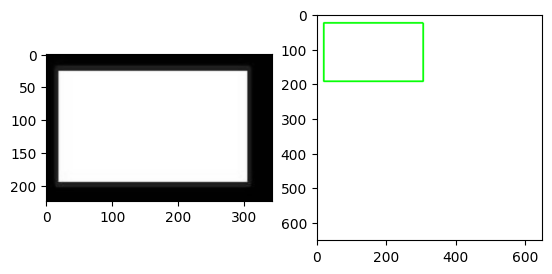

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

blank_image = np.ones((650,650,3),dtype=np.uint8)*255

im = cv.imread('countour.png')
assert im is not None,"file could not read"
imgray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
ret,thresh  = cv.threshold(imgray,127,255,0)
contours,hierarchy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

plt.subplot(121)
plt.imshow(cv.cvtColor(imgray,cv.COLOR_BGR2RGB))
# To draw all the contours in an image:
cv.drawContours(blank_image,contours,-1,(0,255,0),3)
# To draw an individual contour, say 4th contour:
# cv.drawContours(im,contours,-1,(255,0,0),3)
# But most of the time, below method will be useful:
# cnt = contours[4]
# cv.drawContours(im, [cnt], 0, (0,0,255), 3)

# cv.drawContours(im,contours, cv.CHAIN_APPROX_SIMPLE, (0,0,255), 3)
plt.subplot(122)
plt.imshow(cv.cvtColor(blank_image,cv.COLOR_BGR2RGB))

如何绘制轮廓？
要绘制轮廓，使用 cv.drawContours 函数。只要有边界点，它也可用于绘制任何形状。它的第一个参数是源图像，第二个参数是应作为 Python 列表传递的轮廓，第三个参数是轮廓索引（在绘制单个轮廓时很有用。要绘制所有轮廓，请传递 -1），其余参数是颜色、厚度ETC。

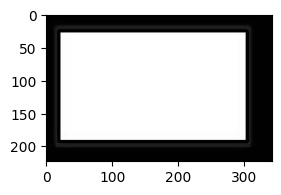

## Moments

图像矩可帮助您计算一些特征，例如物体的质心、物体的面积等。查看关于图像矩的维基百科页面
函数 cv.moments() 给出所有计算出的矩值的字典。见下文：

{'m00': 655.0, 'm10': 70975.0, 'm01': 132414.16666666666, 'm20': 7933550.166666666, 'm11': 14345941.083333332, 'm02': 26777727.666666664, 'm30': 911676346.5, 'm21': 1603945144.3833332, 'm12': 2900674876.9166665, 'm03': 5416976844.150001, 'mu20': 242785.85368956625, 'mu11': -2296.289440203458, 'mu02': 9007.76738761738, 'mu30': -609416.8746573925, 'mu21': 603960.0454340577, 'mu12': 1443.884046023828, 'mu03': -24692.08347606659, 'nu20': 0.5659014129469524, 'nu11': -0.005352344129604237, 'nu02': 0.02099590324017803, 'nu30': -0.05550233132099224, 'nu21': 0.05500535338009445, 'nu12': 0.00013150100373666637, 'nu03': -0.0022488189203239703}
108 202
655.0


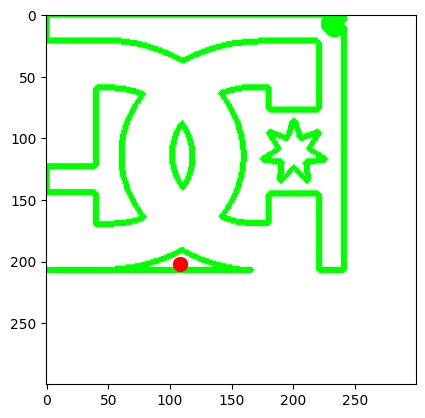

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
blank_image = np.ones((300,300,3),dtype=np.uint8)*255

img = cv.imread('dclogo.png',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not read"
ret,thresh = cv.threshold(img,127,255,0)
#1表示要检测的轮廓类型（cv.RETR_EXTERNAL，仅检测外部轮廓），2表示轮廓的近似方法（cv.CHAIN_APPROX_SIMPLE，对轮廓进行简单的近似）
contours,hierarchy = cv.findContours(thresh,1,2)

#从之前查找到的轮廓列表contours中选择了第一个轮廓，并将其存储在变量cnt中。轮廓列表通常包含多个轮廓，你可以根据需要选择特定的轮廓进行后续分析。
cnt = contours[0]
#计算了所选轮廓cnt的矩（moments）。矩是一种数学描述，可用于计算图像中对象的各种属性，如中心坐标、面积、方向等。cv.moments()函数接受一个轮廓作为参数，并返回包含矩的字典。
M = cv.moments(cnt)
print( M )
#质心计算
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx,cy)

area = cv.contourArea(cnt)
print(area)
cv.drawContours(blank_image,contours,-1,(0,255,0),3)
plt.imshow(cv.cvtColor(blank_image,cv.COLOR_BGR2RGB))
plt.scatter(cx,cy,color = 'red',marker = 'o',s = 100)

3. 轮廓周长
也称为弧长。可以使用 cv.arcLength() 函数找到。第二个参数指定形状是闭合轮廓（如果传递 True），还是只是曲线。

In [3]:
perimeter = cv.arcLength(cnt,True)
print(perimeter)

345.25483322143555


In [4]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

## bouding rectangle 边界矩形
它是一个直矩形，不考虑物体的旋转。所以边界矩形的面积不会是最小的。它是通过函数 cv.boundingRect() 找到的。

C:\Users\daichang\AppData\Local\Temp\ipykernel_54512\2608246837.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


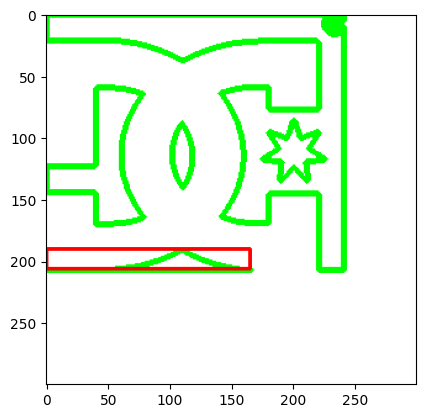

In [7]:
rect=  cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv.drawContours(blank_image,[box],0,(0,0,255),2)
plt.imshow(cv.cvtColor(blank_image,cv.COLOR_BGR2RGB))

# Histograms in OpenCV OpenCV 中的直方图

1.OpenCV中的直方图计算

这是一个使用OpenCV（通常以"cv"别名导入）的函数cv.calcHist()的调用，用于计算图像的直方图。让我详细解释这个函数调用的每个参数以及它的作用：

img: 这是输入图像的参数，通常是一个NumPy数组，表示要计算直方图的图像。直方图是用于表示图像中像素强度分布的工具。

[0]: 这是一个通道选择器的列表，指定你要计算直方图的通道。在这个例子中，我们选择了索引为0的通道（通常是灰度图像的亮度通道），表示我们只对图像的亮度进行直方图分析。如果你处理的是彩色图像，你可以选择不同的通道（例如，[0]表示蓝色通道，[1]表示绿色通道，[2]表示红色通道）。

None: 这个参数是用于掩码的参数，如果你想对图像的特定区域进行直方图分析，你可以传递一个与图像相同大小的掩码图像。在这个例子中，我们没有使用掩码，所以将其设置为None。

[256]: 这是要计算的直方图的bins（箱子）数目。在这个例子中，我们将直方图分成256个bins，表示将图像亮度值范围从0到255划分成256个小区间。

[0, 256]: 这是亮度值的范围，用于指定直方图统计的范围。在这个例子中，我们统计了整个范围，从0到255。

当函数执行完毕后，它将返回一个包含直方图数据的NumPy数组hist，其中每个元素表示在相应的亮度值bin中的像素数量。你可以使用这个直方图来进一步分析图像的亮度分布，例如用于图像增强、直方图均衡化、对比度调整等操作。

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('westbrook.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not be read"
hist = cv.calcHist([img],[0],None,[256],[0,256])


2. Histogram Calculation in Numpy 2.Numpy中的直方图计算
Numpy also provides you a function, np.histogram(). So instead of calcHist() function, you can try below line :

hist,bins = np.histogram(img.ravel(),256,[0,256])
hist is same as we calculated before. But bins will have 257 elements, because Numpy calculates bins as 0-0.99, 1-1.99, 2-2.99 etc. So final range would be 255-255.99. To represent that, they also add 256 at end of bins. But we don't need that 256. Upto 255 is sufficient.

OpenCV function is faster than (around 40X) than np.histogram(). So stick with OpenCV function.

## Plotting Histograms
There are two ways for this,

Short Way : use Matplotlib plotting functions
Long Way : use OpenCV drawing functions

Matplotlib 带有直方图绘制函数：matplotlib.pyplot.hist()
它直接找到直方图并绘制它。您不需要使用 calcHist() 或 np.histogram() 函数来查找直方图。

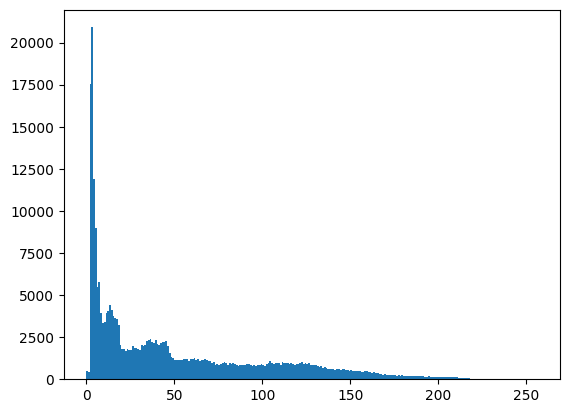

In [4]:
import numpy as np
'''
img.ravel(): 这是输入数据，通常是一个一维的NumPy数组。
在这个情况下，img是一个包含像素值的多维数组（通常是一个图像）
，通过ravel()函数将其展平成一维数组，以便进行直方图统计。
这意味着函数将会统计整个图像的像素值分布。
'''
plt.hist(img.ravel(),256,[0,256])
plt.show()


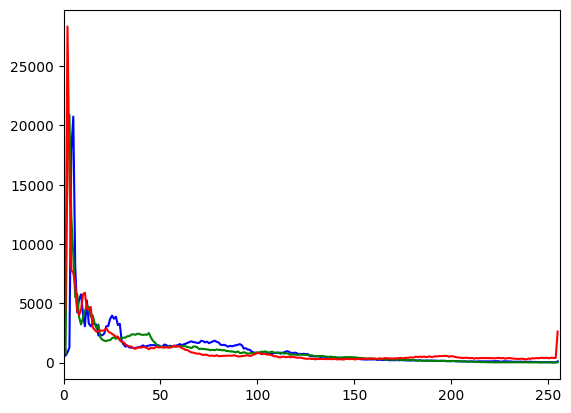

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 

img = cv.imread('westbrook.jpg')
assert img is not None,"file could not read  "
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.show()


##  2D Histograms
User
HSV代表什么
ChatGPT
HSV 代表色相（Hue）、饱和度（Saturation）、明度（Value），它是一种用于描述颜色的色彩模型。这个模型与常见的 RGB（红绿蓝）颜色模型不同，它更符合人类感知颜色的方式。下面是对 HSV 的三个主要分量的解释：

色相（Hue）：色相表示颜色的基本属性，即它看起来是红色、绿色、蓝色等。在 HSV 模型中，色相值以角度（通常在0°到360°之间）表示，将颜色沿色轮循环排列。例如，红色在0°处，绿色在120°处，蓝色在240°处。

饱和度（Saturation）：饱和度表示颜色的鲜艳程度或纯度。较高的饱和度表示颜色更加鲜艳和纯净，而较低的饱和度则表示颜色更加灰暗或接近灰色。饱和度通常以百分比表示，从0%（灰度）到100%（最大饱和度）。

明度（Value）：明度表示颜色的亮度或明亮程度。较高的明度表示颜色较亮，而较低的明度表示颜色较暗。明度通常以百分比表示，从0%（黑色）到100%（白色）。

HSV 色彩模型在图像处理和计算机视觉中常用于颜色分析、颜色检测以及颜色选择等任务。与 RGB 模型相比，HSV 更容易对颜色进行调整和分析，因为它将颜色的不同属性分开，更符合人类感知颜色的方式。

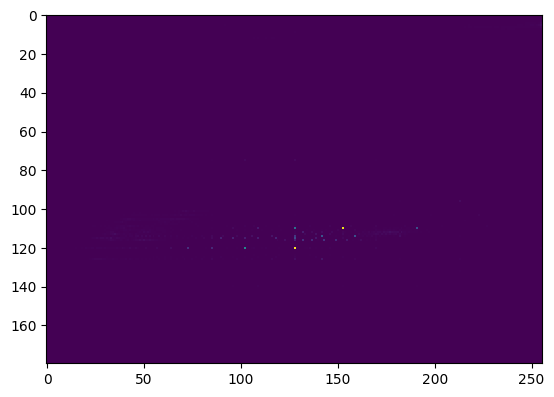

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('westbrook.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

# Fourier Transform

理论
傅里叶变换用于分析各种滤波器的频率特性。对于图像，使用二维离散傅立叶变换 (DFT) 来查找频域。 DFT 的计算使用一种称为快速傅里叶变换 (FFT) 的快速算法。
对于正弦信号，x(t)=Asin(2πft)，我们可以说f是信号的频率，如果取其频域，我们可以看到f处有一个尖峰。如果对信号进行采样以形成离散信号，我们将获得相同的频域，但在 [−π,π] 或 [0,2π] 范围内具有周期性（对于 N 点 DFT，则为 [0,N]）。您可以将图像视为在两个方向上采样的信号。因此，在 X 和 Y 方向上进行傅里叶变换可以得到图像的频率表示。
更直观的来说，对于正弦信号，如果其幅度在短时间内变化得这么快，就可以说它是一个高频信号。如果变化缓慢，则为低频信号。您可以将相同的想法扩展到图像。图像中哪些地方振幅变化很大？在边缘点或噪声处。所以我们可以说，边缘和噪声是图像中的高频内容。如果幅度没有太大变化，则它是低频分量。 （附加资源_中添加了一些链接，通过示例直观地解释了频率变换）。


## Fourier Transform in Numpy
Numpy 中的傅里叶变换
首先，我们将了解如何使用 Numpy 求傅立叶变换。 Numpy 有一个 FFT 包可以做到这一点。 np.fft.fft2() 为我们提供了频率变换，它将是一个复杂的数组。它的第一个参数是输入图像，它是灰度的。第二个参数是可选的，它决定输出数组的大小。如果大于输入图像的大小，则在计算 FFT 之前用零填充输入图像。如果小于输入图像，则输入图像将被裁剪。如果没有传递参数，输出数组大小将与输入相同。
现在，一旦得到结果，零频率分量（直流分量）将位于左上角。如果你想让它居中，你需要将结果在两个方向上移动 N2。这只需通过函数 np.fft.fftshift() 即可完成。 （这样更容易分析）。一旦找到频率变换，您就可以找到幅度谱。

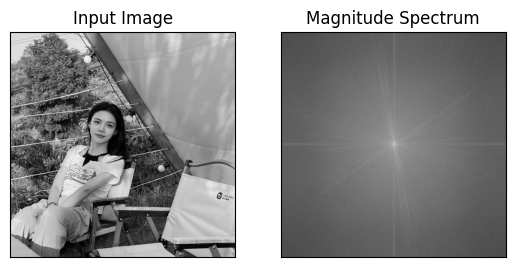

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img =  cv.imread('aoxue.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None,"file could not read "
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#这行代码计算了频谱的幅度谱，也称为频谱的强度。它通过取 fshift 的绝对值，然后应用对数变换来增强可视化效果。通常，对数变换用于扩展幅度范围，使较小的值更加可见。
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


所以你找到了频率变换现在你可以在频域做一些操作，比如高通滤波和重建图像，即找到逆DFT。为此，您只需使用尺寸为 60x60 的矩形窗口进行掩蔽即可消除低频。然后使用 np.fft.ifftshift() 应用反向移位，以便 DC 分量再次出现在左上角。然后使用 np.ifft2() 函数求逆 FFT。结果再次将是一个复数。你可以取它的绝对值。

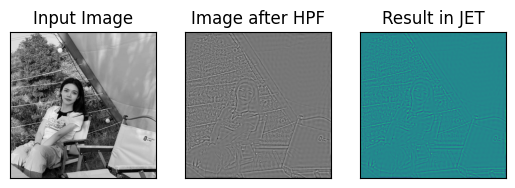

In [16]:
rows,cols = img.shape
crow,ccol = rows //2, cols //2
#这行代码将频谱中心周围的一个正方形区域设置为零。具体来说，它将 fshift 中以 (crow - 30, ccol - 30) 为左上角，以 (crow + 30, ccol + 30) 为右下角的区域置零。这种操作通常称为频域滤波，这里的效果是在频谱中去除中心的低频分量。
fshift[crow - 30:crow + 31,ccol - 30:ccol + 31] = 0
#这行代码通过使用 np.fft.ifftshift 函数逆向平移频谱，将零频率分量返回到频谱的原始位置。f_ishift 现在包含了修复后的频谱。
f_ishift = np.fft.ifftshift(fshift)
#这行代码使用逆傅立叶变换 (np.fft.ifft2) 将修复后的频谱 f_ishift 转换回空间域，以获得重建的图像。img_back 包含了从频域到空间域的转换结果。
img_back = np.fft.ifft2(f_ishift)
#这行代码提取逆傅立叶变换的实部，因为逆傅立叶变换产生的结果是一个复数数组，但图像通常是实数值。提取实部将得到最终的重建图像 img_back。
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

结果表明高通滤波是一种边缘检测操作。这是我们在图像渐变章节中看到的。这也表明大部分图像数据存在于频谱的低频区域。

## Fourier Transform in OpenCV
OpenCV 为此提供了函数 cv.dft() 和 cv.idft()。它返回与之前相同的结果，但有两个通道。第一个通道将具有结果的实部，第二通道将具有结果的虚部。输入图像应首先转换为 np.float32。我们将看看如何去做。

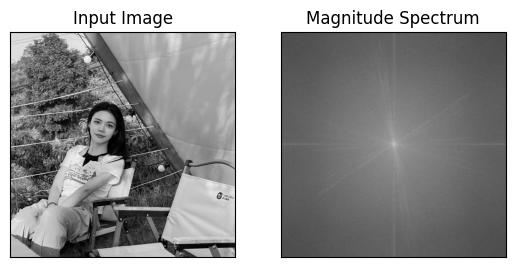

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('aoxue.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
#这行代码使用 OpenCV 的 dft 函数对灰度图像 img 执行二维离散傅立叶变换（DFT）。首先，它将图像的数据类型转换为 np.float32，以便进行傅立叶变换。flags=cv.DFT_COMPLEX_OUTPUT 指定输出为复数形式，因为傅立叶变换的结果通常包括实部和虚部。
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
#这行代码计算了频谱的幅度谱，也称为频谱的强度。它通过调用 OpenCV 的 magnitude 函数来计算幅度，然后应用对数变换来增强可视化效果。dft_shift[:, :, 0] 和 dft_shift[:, :, 1] 分别表示频谱中的实部和虚部。对数变换通常用于扩展幅度范围，使较小的值更加可见。
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

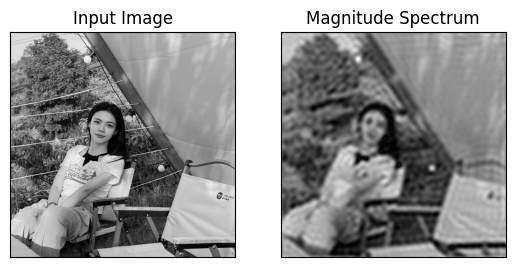

In [22]:
rows,cols = img.shape
crow,ccol = rows//2,cols//2

#create a mask first,ceter square is 1,remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] =  1
#apply mask and inverse DFT
fshift=  dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

与往常一样，OpenCV 函数 cv.dft() 和 cv.idft() 比 Numpy 对应函数更快。但 Numpy 函数更加用户友好。有关性能问题的更多详细信息，请参阅以下部分。

# Template Matching 模板匹配
理论
模板匹配是一种在较大图像中搜索并找到模板图像位置的方法。为此，OpenCV 附带了一个函数 cv.matchTemplate()。它只是将模板图​​像滑动到输入图像上（如在 2D 卷积中），然后比较模板图像下的模板和输入图像块。 OpenCV 中实现了几种比较方法。 （您可以查看文档以获取更多详细信息）。它返回一个灰度图像，其中每个像素表示该像素的邻域与模板的匹配程度。
如果输入图像的尺寸为 (WxH)，模板图像的尺寸为 (wxh)，则输出图像的尺寸将为 (W-w+1, H-h+1)。获得结果后，您可以使用 cv.minMaxLoc() 函数查找最大/最小值在哪里。以它为矩形的左上角，以(w,h)为矩形的宽度和高度。该矩形是您的模板区域。

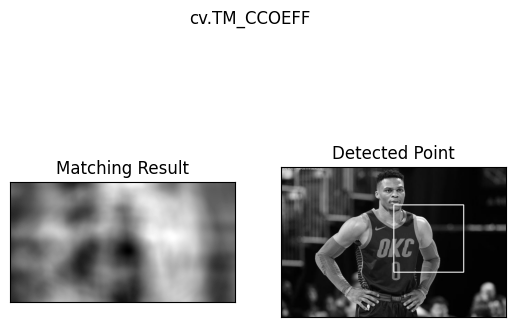

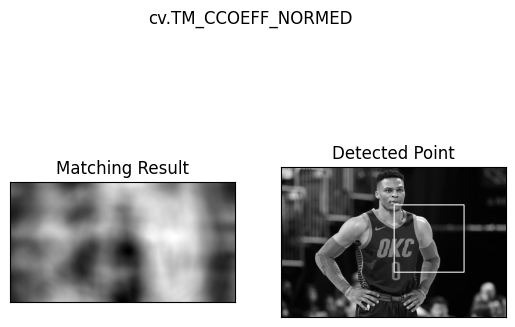

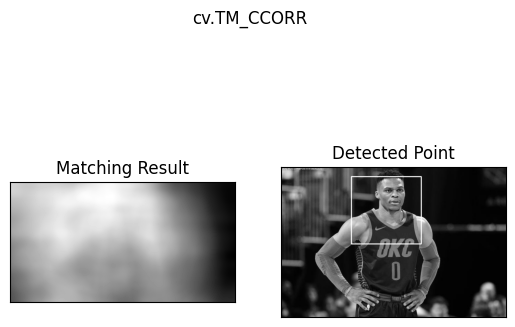

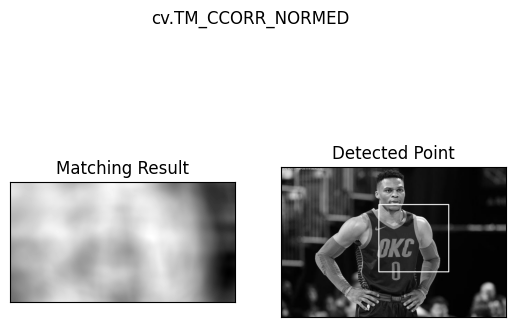

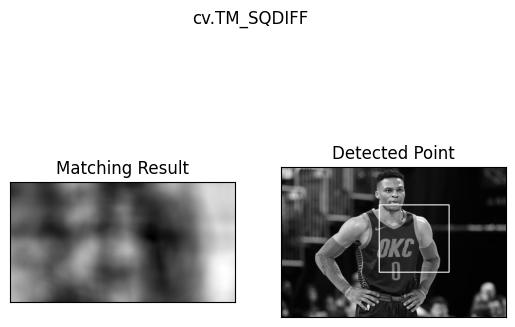

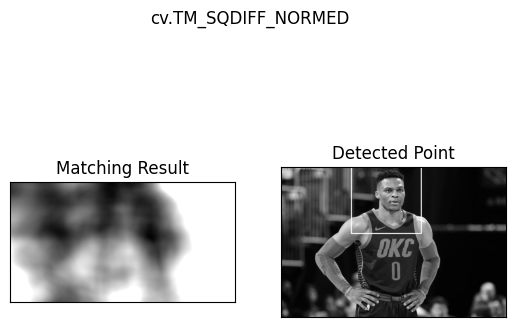

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('westbrook.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
 img = img2.copy()
 method = eval(meth)
 # Apply template Matching
 res = cv.matchTemplate(img,template,method)
 min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
 if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
     top_left = min_loc
 else:
     top_left = max_loc
 bottom_right = (top_left[0] + w, top_left[1] + h)
 cv.rectangle(img,top_left, bottom_right, 255, 2)
 plt.subplot(121),plt.imshow(res,cmap = 'gray')
 plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
 plt.subplot(122),plt.imshow(img,cmap = 'gray')
 plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
 plt.suptitle(meth)
 plt.show()

## Hough Line Transform 霍夫线变换

理论
霍夫变换是一种检测任何形状的流行技术，如果您可以用数学形式表示该形状。即使有一点破损或扭曲，它也能检测到形状。我们将看到它如何用于一条线。

## Hough Circle Transform

Learn to detect circles in an image

## Image Segmentation with Watershed Algorithm

Learn to segment images with watershed segmentation

## Interactive Foreground Extraction using GrabCut Algorithm

Learn to extract foreground with GrabCut algorithm

# Feature Detection and Description

因此，基本上，在图像中，角落被认为是良好的特征。（不仅是角落，在某些情况下，斑点也被认为是良好的特征）
我们如何找到角点？我们以直观的方式回答了这个问题，即寻找图像中在其周围所有区域移动（少量）时变化最大的区域。这将在接下来的章节中被投射到计算机语言中。所以找到这些图像特征就称为特征检测 Feature Detection
同样，计算机也应该描述特征周围的区域，以便它可以在其他图像中找到它。这种所谓的描述被称为特征描述 feature description。一旦你有了特征及其描述，你就可以在所有图像中找到相同的特征并将它们对齐、拼接在一起或进行任何你想要的操作。
因此，在本模块中，我们将寻求 OpenCV 中的不同算法来查找特征、描述它们、匹配它们等。



在上一章中，我们看到角点是图像中在所有方向上强度变化较大的区域。 Chris Harris 和 Mike Stephens 在 1988 年的论文《组合角点和边缘检测器》中进行了一项早期尝试，以找到这些角点，因此现在称为 Harris 角点检测器。他将这个简单的想法转化为数学形式。它基本上找到了 (u,v) 在所有方向上位移的强度差异。这表达如下：
![Alt text](image-1.png)
The window function is either a rectangular window or a Gaussian window which gives weights to pixels underneath.

We have to maximize this function E(u,v) for corner detection. That means we have to maximize the second term. Applying Taylor Expansion to the above equation and using some mathematical steps (please refer to any standard text books you like for full derivation), we get the final equation as:![Alt text](image-2.png)

User
矩形窗和高斯窗是什么，有什么区别
ChatGPT
矩形窗（Rectangular Window）和高斯窗（Gaussian Window）是信号处理领域中常用的窗函数，用于对信号进行窗口函数加权处理，以改善信号的频谱特性或限制频谱泄漏。它们在窗口函数设计和应用中有不同的特点和用途。

矩形窗（Rectangular Window）：

矩形窗是一种最简单的窗口函数，它将信号在窗口内全部保留，而在窗口外全部置零。
矩形窗的频谱特性是典型的，具有宽主瓣和高副瓣。这意味着在频谱分析中，矩形窗可以提供较高的分辨率，但会引入频谱泄漏，尤其是当信号的频率不在窗口的中心时。
矩形窗通常用于对信号进行简单的频谱分析，但在需要更好频谱特性的情况下，其他窗口函数如汉宁窗或汉明窗更常被选择。
高斯窗（Gaussian Window）：

高斯窗是一种窗口函数，它的形状类似于高斯分布曲线。它的数学形式是一个钟形曲线，中心最大，向两侧逐渐减小。
高斯窗的频谱特性具有较窄的主瓣和较低的副瓣。这意味着它对频谱泄漏的抑制效果较好，可以更好地保留信号的频率信息。
高斯窗通常在需要较好频谱特性或在信号分析中需要抑制频谱泄漏时使用。它在一些应用中，如信号调制和滤波，非常有用。
区别：

主要区别在于频谱特性：矩形窗的频谱主瓣较宽，副瓣较高，导致频谱泄漏；而高斯窗的频谱主瓣较窄，副瓣较低，抑制了频谱泄漏。
矩形窗通常用于简单的频谱分析，而高斯窗通常用于需要更好频谱特性的情况，或者对频谱泄漏更敏感的应用。
选择窗口函数通常取决于特定应用的要求，需要权衡分辨率和频谱泄漏之间的权衡。其他窗口函数，如汉宁窗、汉明窗、布莱克曼窗等，也可以根据具体需求使用。

![Alt text](image-4.png)

![Alt text](image-5.png)

因此，哈里斯角点检测的结果是具有这些分数的灰度图像。适当分数的阈值可以为您提供图像中的角点。我们将用一个简单的图像来完成它。


In [1]:
# 加载一张图像，将其转换为灰度图像，然后使用Harris角点检测算法检测角点，并将检测到的角点在图像上标记为红色。用户可以通过按下任意键来关闭显示的图像窗口。
import numpy as np
import cv2 as cv
filename = 'dclogo.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
'''

dst = cv.cornerHarris(gray, 2, 3, 0.04) 这行代码使用 OpenCV 中的 cornerHarris 函数对灰度图像 gray 进行角点检测，生成一个角点响应图像 dst。以下是对这行代码中参数的解释：

gray：这是输入的灰度图像，也就是待检测角点的图像。

2：这是角点检测中的窗口大小，通常称为角点检测窗口。它定义了用于检测角点的局部区域大小。在这个例子中，窗口大小为 2x2 像素。

3：这是 Sobel 导数中的孔径大小。在角点检测中，通常使用 Sobel 滤波来计算图像中像素点的梯度。这个参数定义了 Sobel 滤波器的孔径大小，通常设置为奇数。在这个例子中，孔径大小为 3。

0.04：这是 Harris 角点检测的自由参数（常数），通常称为 k 值。这个参数用于调整角点响应图像中角点的敏感度。较小的 k 值会导致更多的像素被认为是角点，而较大的 k 值会使角点更加稀疏。在这个例子中，k 值为 0.04。

cornerHarris 函数根据输入的图像和参数计算出角点响应图像 dst，其中每个像素的值代表了该像素是否可能是角点以及角点的响应程度。通常，角点的响应值较大，而非角点的区域响应值较小。

在这个代码示例中，后续的操作会根据 dst 中的角点响应值，通过阈值来确定哪些像素点被认为是角点，并将它们标记为红色，以突出显示在图像上。这是一种基本的角点检测和突出显示的示例，通常用于计算机视觉和图像处理应用中，以检测图像中的关键点或兴趣点。

'''
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
 cv.destroyAllWindows()

带有亚像素精度的角点
有时，您可能需要以最高精度找到角点。OpenCV提供了一个cv.cornerSubPix()函数，可以进一步精确化检测到的角点。以下是一个示例。像往常一样，我们首先需要找到Harris角点。然后，我们将这些角点的质心（一个角上可能有一堆像素，我们取它们的质心）传递给函数以进行精确化。Harris角点用红色像素标记，而精确化的角点用绿色像素标记。对于此函数，我们必须定义何时停止迭代的条件。我们可以在经过指定次数的迭代或达到一定精度时停止迭代，以先到者为准。我们还需要定义搜索角点的邻域大小。

In [2]:
import numpy as np
import cv2 as cv
filename = 'dclogo.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)

C:\Users\daichang\AppData\Local\Temp\ipykernel_10980\4105669747.py:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  res = np.int0(res)


True

## 